### Exercícios

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Questão 1 \
O dataset "real_state_ny.csv" mostra dados de casas à venda no estado de Nova Iorque, nos EUA. Utilizando este dataset: \
a) Informe a média, a mediana e o desvio padrão do preço das casas de 3 quartos (bed = 3) da cidade de Albany (city = 'Albany') \
b) Gere um boxplot do preço do imóvel por número de quartos na cidade de Albany. Limite o número de quartos a no máximo 5.

In [2]:
df = pd.read_csv("real_state_ny.csv")
df.head(5)

,Unnamed: 0,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,30149,for_sale,3.0,1.0,60.00,Berlin,New York,12022.0,1176.0,NaN,175000.0
1,54248,for_sale,3.0,2.0,2.02,Claverack,New York,12521.0,1600.0,2021-11-24,425000.0
2,54258,for_sale,4.0,2.0,0.24,Copake,New York,12521.0,1239.0,2018-02-01,225000.0
3,54259,for_sale,3.0,3.0,1.90,Copake,New York,12516.0,1800.0,NaN,419000.0
4,54262,for_sale,3.0,2.0,2.00,Copake,New York,12517.0,1482.0,NaN,365000.0


In [3]:
df1 = df[(df['city']=='Albany') & (df['bed']==3)]['price']
df1

124401    259900.0
124404    274900.0
124420    350000.0
124456    274900.0
126409    210000.0
            ...   
181498    365000.0
181519    300000.0
181521     85000.0
181523    228000.0
181529    214900.0
Name: price, Length: 2202, dtype: float64

In [4]:
print(df1.mean())
print(df1.median())
print(df1.std())

218427.444595822
209900.0
98029.63906952183


<Axes: title={'center': 'price'}, xlabel='bed'>

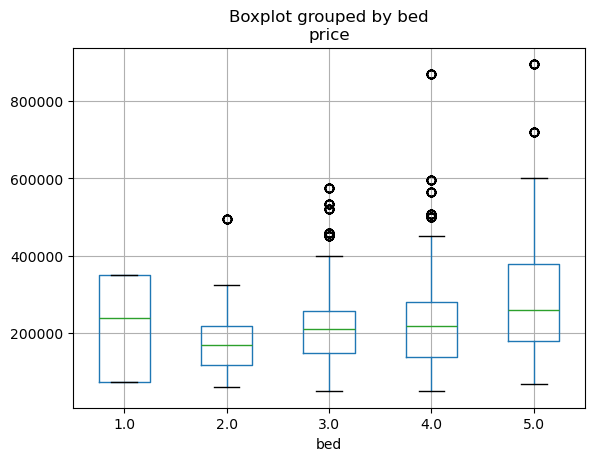

In [5]:
df2 = df[(df['city']=='Albany')]
df3 = df2[df2['bed']<=5]
df3.boxplot(by ='bed', column =['price'])

Questão 2 \
Plote um gráfico de pizza que mostre a porcentagem de imóveis por número de quartos para a cidade de Albany.

In [6]:
result = df2.groupby('bed').count()
result

,Unnamed: 0,status,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
bed,,,,,,,,,,
1.0,59,59,59,59,59,59,59,59,59,59
2.0,735,735,735,735,735,735,735,735,525,735
3.0,2202,2202,2202,2202,2202,2202,2202,2202,1515,2202
4.0,1508,1508,1508,1508,1508,1508,1508,1508,896,1508
5.0,684,684,684,684,684,684,684,684,396,684
6.0,1311,1311,1311,1311,1311,1311,1311,1311,824,1311
7.0,279,279,279,279,279,279,279,279,99,279
8.0,158,158,158,158,158,158,158,158,79,158
9.0,101,101,101,101,101,101,101,101,21,101


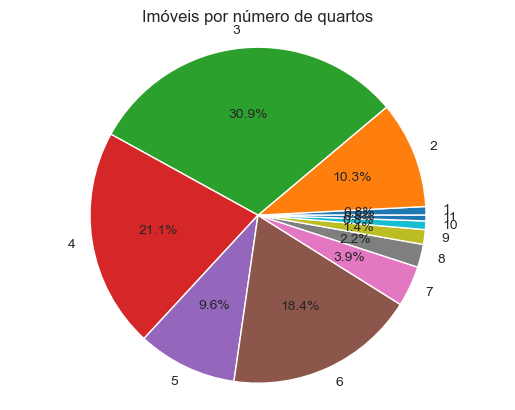

In [7]:
result = df2.groupby('bed')['bed'].count()
sizes = result
labels = ['1','2','3','4','5','6','7','8','9','10','11']
sns.set_style("darkgrid")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.title('Imóveis por número de quartos')
plt.axis('equal')
plt.show()

Questão 3 \
Plote um gráfico de barras que mostre o preço médio das casas de acordo com o número de banheiros nas cidades de New York, Albany, Yonkers e Long Beach. Limite o número de banheiros a 4, ou seja, descarte os imóveis que tenham mais que 4 banheiros.

In [8]:
df1 = df[(df['city'].isin(['New York', 'Albany', 'Yonkers', 'Long Beach', 'Rochester'])) &(df['bath'] <= 4)]

df2 = pd.crosstab(df1['city'], df1['bath'], values=df1['price'], aggfunc=np.mean)
df2

/var/folders/f0/cfs4wy953p373457mrtkm3wm0000gn/T/ipykernel_37946/2365302587.py:3: FutureWarning: The provided callable <function mean at 0x108600720> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df2 = pd.crosstab(df1['city'], df1['bath'], values=df1['price'], aggfunc=np.mean)


bath,1.0,2.0,3.0,4.0
city,,,,
Albany,160418.955513,1.975410e+05,2.813642e+05,3.982688e+05
Long Beach,536753.846154,6.664471e+05,1.692644e+06,1.497056e+06
New York,688134.751773,1.689814e+06,1.548495e+06,3.655596e+06
Yonkers,366334.497307,5.764190e+05,6.770363e+05,9.527283e+05


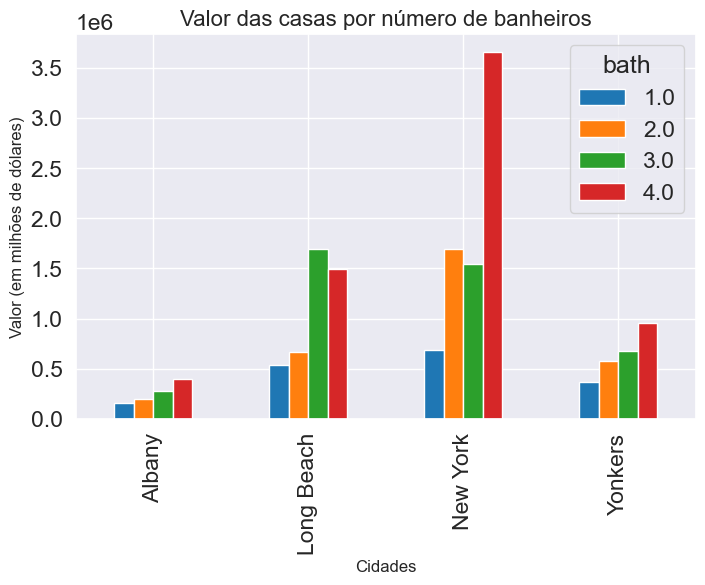

In [9]:
plt.rcParams["figure.figsize"] = [8,5]
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":12})
df2.plot(kind="bar",stacked=False)
plt.title("Valor das casas por número de banheiros")
plt.ylabel("Valor (em milhões de dólares)")
plt.xlabel("Cidades")
plt.show()

Questão 4 \
Plote dois histogramas lado a lado comparando o preço dos imóveis nas cidades de Yokers e Albany. Use bins=15.

In [10]:
df3 = df[df['city']=='Yonkers']
df4 = df[df['city']=='Albany']

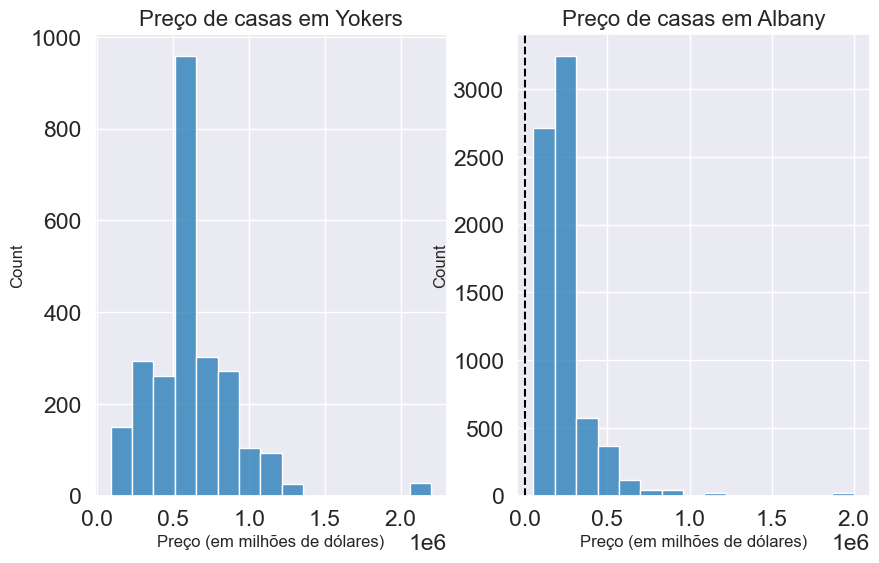

In [11]:
plt.rcParams["figure.figsize"] = [10,6]
sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.histplot(df3['price'], bins=15, kde=False)
plt.title("Preço de casas em Yokers")
plt.xlabel("Preço (em milhões de dólares)")

plt.subplot(1,2,2)
sns.histplot(df4['price'], bins=15,  kde=False)
plt.title("Preço de casas em Albany")
plt.xlabel("Preço (em milhões de dólares)")
plt.axvline(60,color="k",linestyle="--")
plt.show()